In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.0/38.6 MB 281.8 kB/s eta 0:02:17
   ---------------------------------------- 0.1/38.6 MB 459.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/38.6 MB 504.4 kB/s eta 0:01:17
   ---------------------------------------- 0.1/38.6 MB 450.6 kB/s eta 0:01:26
   ---------------------------------------- 0.2/38.6 MB 622.7 kB/s eta 0:01:02
   ---------------------------------------- 0.3/38.6 MB 811.7 kB/s eta 0:00:48
   ---------------------------------------- 0.3/38.6 MB 813.9 kB/s eta 0:00:48
   ---------------------------------------- 0.4/38.6 MB 972.9 kB/s eta 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


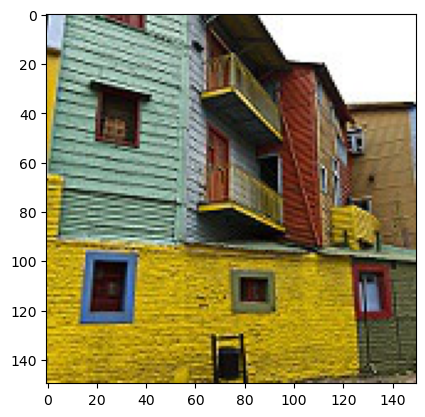

In [5]:
img=image.load_img("main folder/seg_train/seg_train/buildings/4.jpg")
plt.imshow(img)


In [8]:
cv2.imread("main folder/seg_train/seg_train/buildings/4.jpg").shape # this is rgb three colur, with 150 hieght and 150 width

array([[[ 42,  30,  20],
        [255, 244, 231],
        [238, 209, 194],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 58,  43,  34],
        [255, 241, 228],
        [229, 201, 184],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 70,  54,  42],
        [255, 251, 236],
        [238, 213, 193],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 34, 170, 199],
        [ 43, 179, 208],
        [ 35, 168, 201],
        ...,
        [ 68,  93, 109],
        [ 80, 102, 120],
        [ 97, 119, 137]],

       [[  0,  95, 127],
        [  0, 101, 133],
        [  0, 129, 160],
        ...,
        [111, 136, 152],
        [117, 137, 155],
        [143, 162, 183]],

       [[ 52, 187, 219],
        [ 78, 218, 249],
        [ 77, 220, 251],
        ...,
        [150, 173, 189],
        [148, 167, 188],
        [114, 131, 152]]

In [9]:
train=ImageDataGenerator(rescale=1/255) # its ranges is from 0 - 255, and there i want to its range between 0-1, so divide the whole by 255
validation=ImageDataGenerator(rescale=1/255) 

In [27]:
train_dataset=train.flow_from_directory('main folder/seg_train/seg_train/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

validation_dataset=train.flow_from_directory('main folder/vali/valid/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [39]:
train_dataset.class_indices


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(200, 200, 3)),  # Use Input layer to specify the input shape
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Update the number of units in the output layer to match the number of classes (e.g., 10 classes)
    tf.keras.layers.Dense(6, activation='softmax')
])

In [46]:
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [50]:

# Train the model using the training data
history = model.fit(train_dataset,
                    steps_per_epoch=38,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.3643 - loss: 1.5431 - val_accuracy: 0.4280 - val_loss: 1.6942
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.3764 - loss: 1.4301 - val_accuracy: 0.4657 - val_loss: 1.3514
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 227ms/step - accuracy: 0.4550 - loss: 1.6014 - val_accuracy: 0.4897 - val_loss: 1.2985
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.4894 - loss: 1.4098 - val_accuracy: 0.3713 - val_loss: 1.5149
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.4588 - loss: 1.2273 - val_accuracy: 0.4777 - val_loss: 1.3017
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - accuracy: 0.4935 - loss: 1.2195 - val_accuracy: 0.4797 - val_loss: 1.2929
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.6146 - loss: 1.2029 - val_accuracy: 0.4930 - val_loss: 1.2949
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.4605 - loss: 1.3742 - val_accuracy: 0.

In [51]:
# Load test data using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1/255)  # Scale pixel values to range [0, 1]

test_dataset = test_datagen.flow_from_directory(
    'main folder/seg_test/seg_test/',
    target_size=(200, 200),
    batch_size=10,
    class_mode='categorical'
)

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_dataset)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
    

Found 3000 images belonging to 6 classes.
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6812 - loss: 0.8866
Test Loss: 0.9365286231040955
Test Accuracy: 0.6476666927337646
